In [1]:
# Install necessary libraries
!pip install -q transformers accelerate Pillow matplotlib

# Import libraries
from transformers import AutoModelForDepthEstimation, AutoImageProcessor
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt

In [2]:
# Load the model
processor = AutoImageProcessor.from_pretrained("facebook/dpt-dinov2-large-kitti")
model = AutoModelForDepthEstimation.from_pretrained("facebook/dpt-dinov2-large-kitti")

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/442 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

In [3]:
# Load an example image (you can replace this with your own image)
url = "https://s.studiobinder.com/wp-content/uploads/2024/12/When-is-Deep-Depth-of-Field-StudioBinder-scaled.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Preprocess the image and make a prediction
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# Interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)


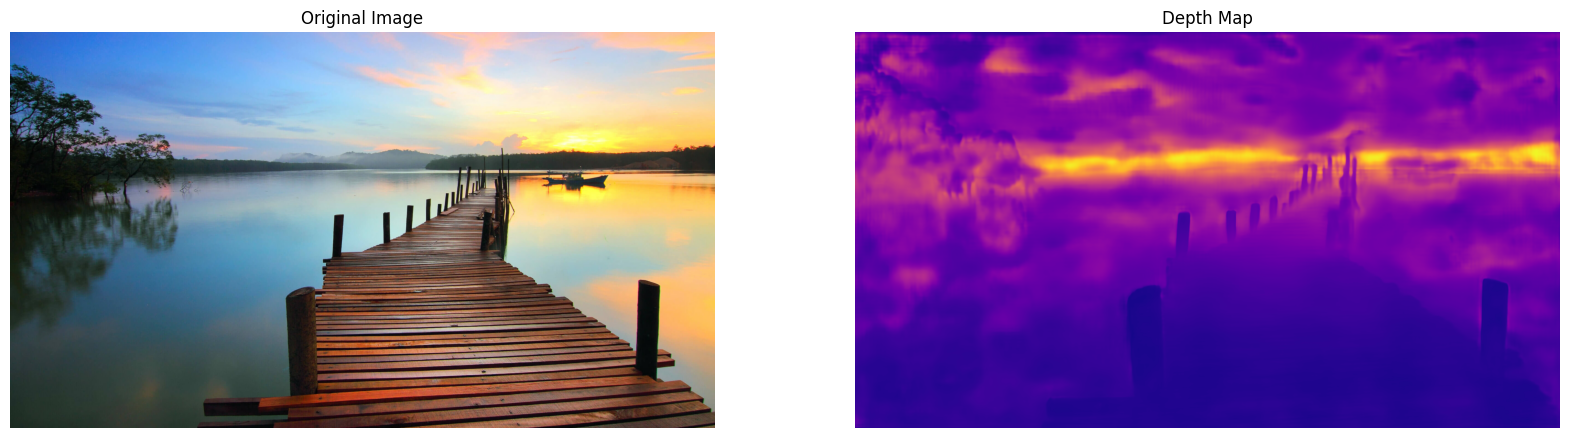

In [4]:
# Visualize the depth map
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / output.max()).astype("uint8")
depth = Image.fromarray(formatted)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
plt.title("Depth Map")

axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(depth, cmap='plasma')
axes[1].axis('off')
axes[1].set_title('Depth Map')

plt.show()